<a href="https://colab.research.google.com/github/minhlip/Machine-Learning-IDS-CICIDS2017/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd

df_empty = pd.DataFrame()

# Tạo tệp CSV mới
df_empty.to_csv("/content/drive/MyDrive/CSVs/importance_list_all_data.csv")

/content/drive/MyDrive/CSVs/all_data_merged_balanced importance list:
/content/drive/MyDrive/CSVs/all_data_merged_balanced 
                              importance
Features                               
Bwd Packet Length Std          0.363093
Flow IAT Min                   0.010902
Fwd Packet Length Std          0.006629
Fwd IAT Total                  0.005475
Total Length of Bwd Packets    0.004329
Flow IAT Mean                  0.003756
Flow IAT Std                   0.001697
Flow Duration                  0.001676
Flow IAT Max                   0.001474
Bwd Packet Length Mean         0.001055
Flow Packets/s                 0.000989
Fwd Packet Length Mean         0.000891
Flow Bytes/s                   0.000843
Total Fwd Packets              0.000717
Total Backward Packets         0.000656
Fwd Packet Length Min          0.000615
Bwd Packet Length Max          0.000303
Total Length of Fwd Packets    0.000232
Fwd Packet Length Max          0.000162
Bwd Packet Length Min          0.00

TypeError: FigureCanvasPdf.print_pdf() got an unexpected keyword argument 'papertype'

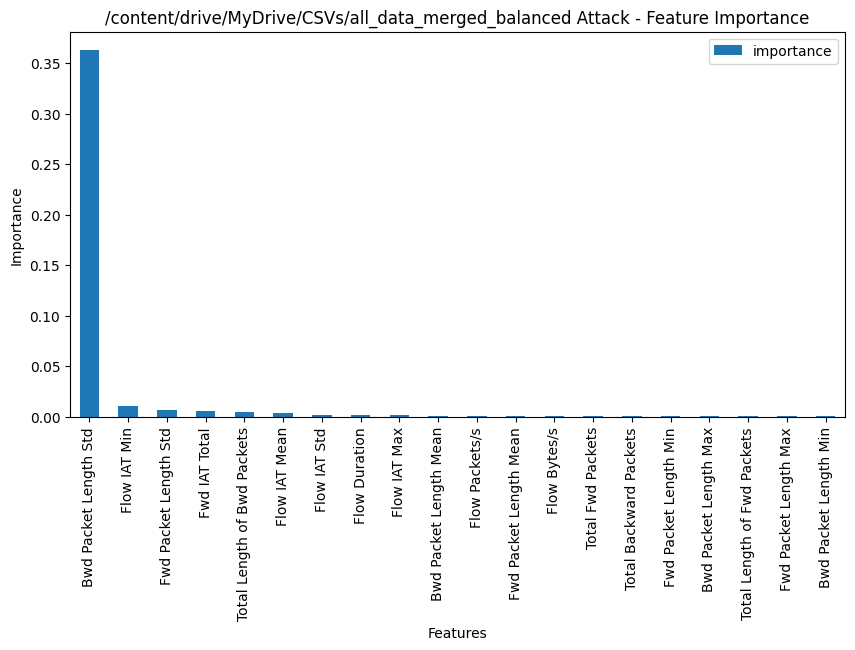

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()



# CSV files names:
csv_files=["/content/drive/MyDrive/CSVs/all_data_merged_balanced.csv"]# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("/content/drive/MyDrive/CSVs/importance_list_all_data.csv", "w")

for j in csv_files:
    df=pd.read_csv(j, usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values


    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0


    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")


print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"secomds")
ths.close()
